<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

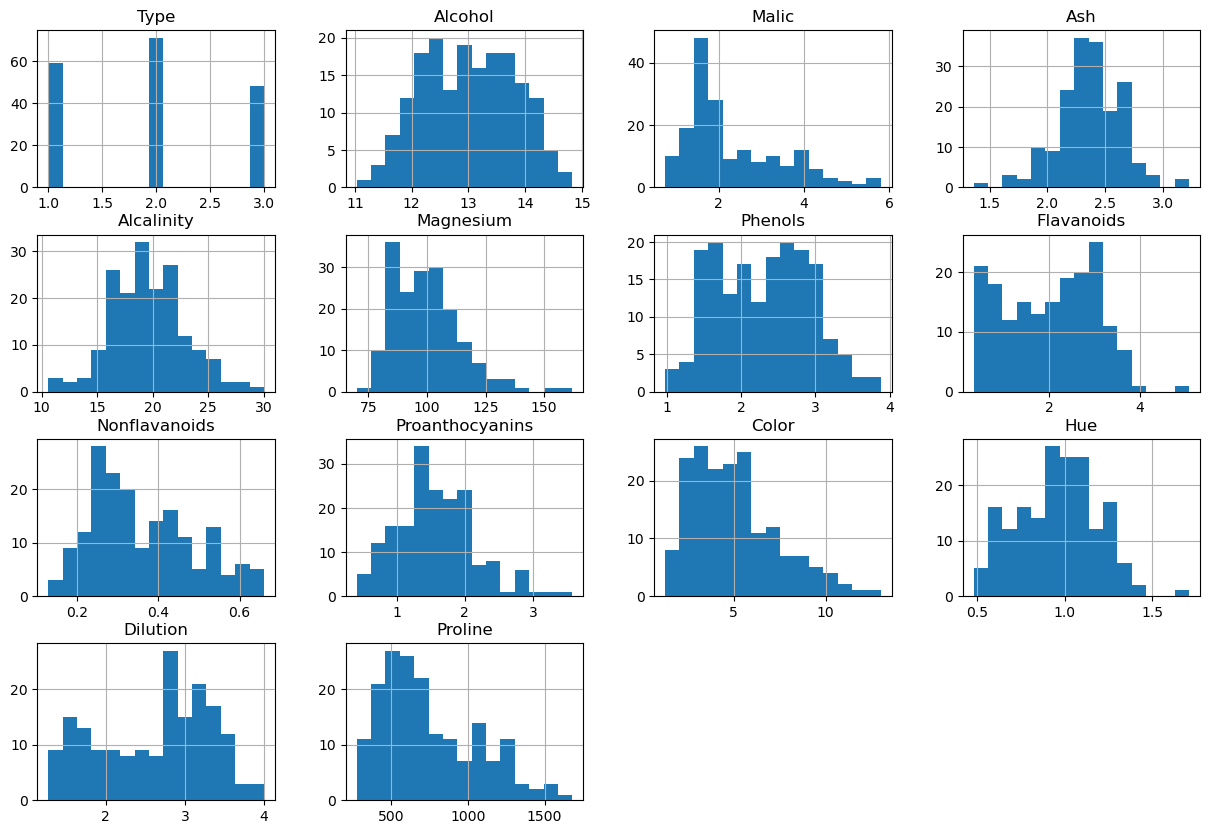

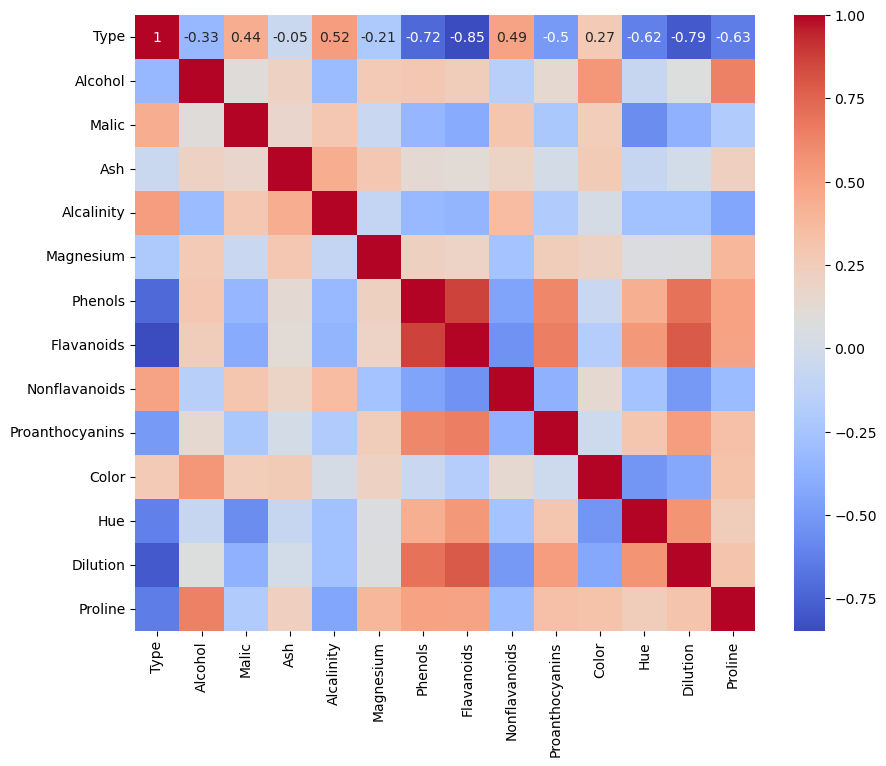

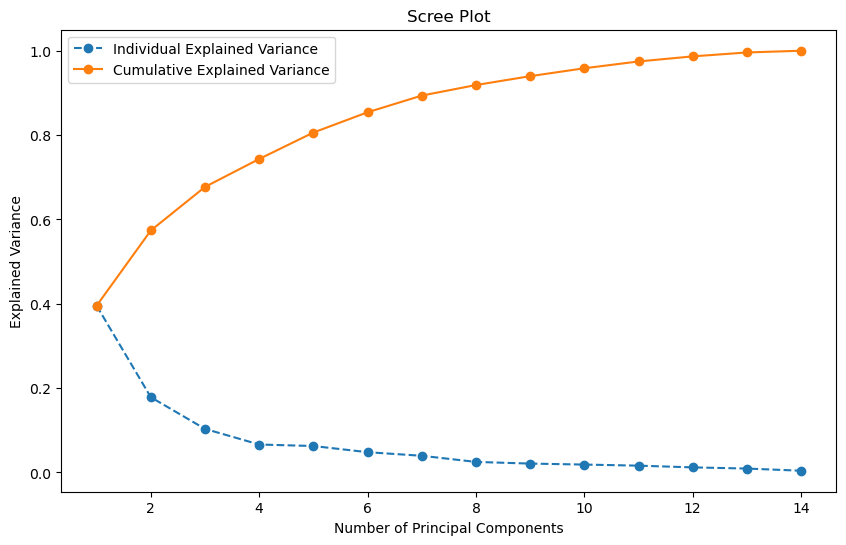

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

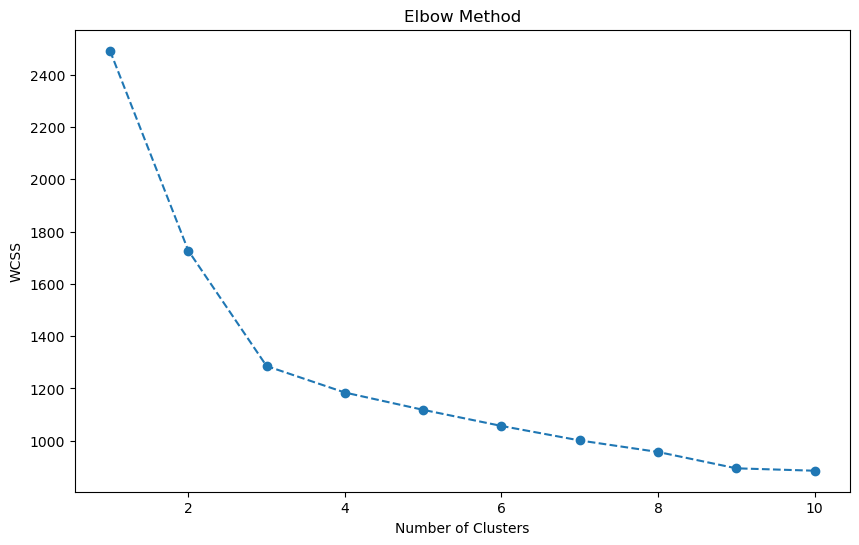

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


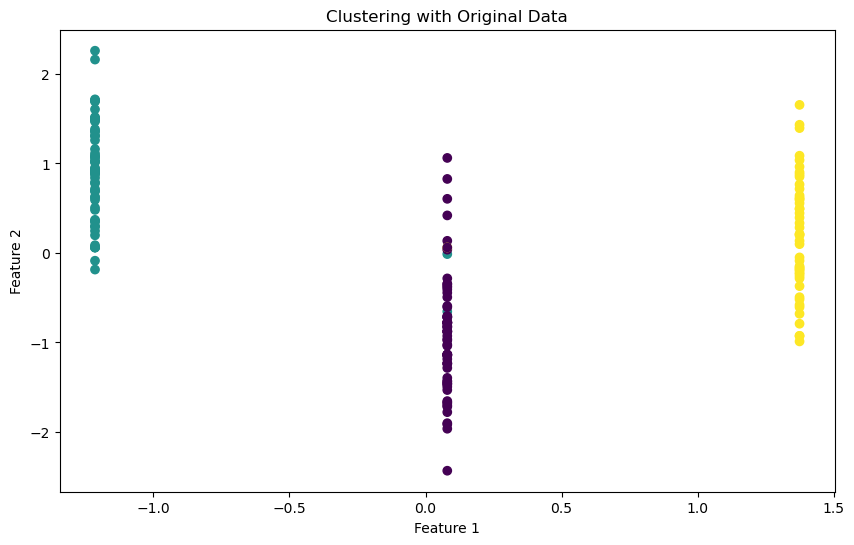

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


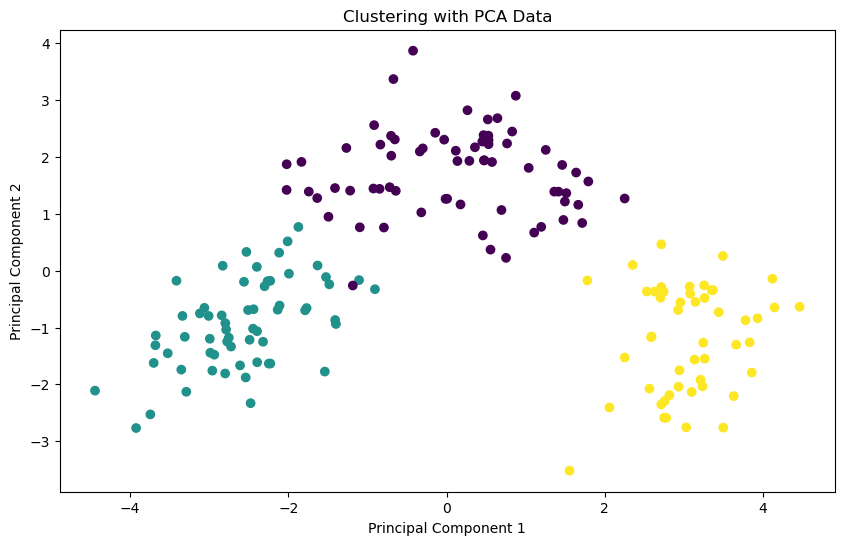

Silhouette Score (PCA Data): 0.30773604383565195
Davies-Bouldin Index (PCA Data): 1.3163957434114115
Comparison of Clustering Performance:
Silhouette Score - Original Data: 0.30773604383565206, PCA Data: 0.30773604383565195
Davies-Bouldin Index - Original Data: 1.3163957434114109, PCA Data: 1.3163957434114115
Key Findings and Insights:
The comparison shows how dimensionality reduction affects clustering performance.
When to use PCA depends on whether you prioritize reducing dimensionality for performance or maintaining the original feature space for interpretability.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os
os.environ["OMP_NUM_THREADS"] = "1"
# Task 1: Exploratory Data Analysis (EDA)
# Load the dataset
df = pd.read_csv('D:/Data science ass/9/PCA/wine.csv')

# Basic data exploration
print(df.info())
print(df.describe())

# Visualize the distribution of features
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Task 2: Dimensionality Reduction with PCA
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

# Task 3: Clustering with Original Data
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Apply K-means with optimal number of clusters (e.g., 3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(scaled_data)

# Visualize the clustering results (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_original, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering with Original Data')
plt.show()

# Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, clusters_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')

# Task 4: Clustering with PCA Data
# Apply K-means to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Visualize the clustering results (using the first two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering with PCA Data')
plt.show()

# Evaluate clustering performance on PCA data
silhouette_pca = silhouette_score(pca_data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

# Task 5: Comparison and Analysis
print("Comparison of Clustering Performance:")
print(f"Silhouette Score - Original Data: {silhouette_original}, PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original}, PCA Data: {davies_bouldin_pca}")

# Task 6: Conclusion and Insights
print("Key Findings and Insights:")
print("The comparison shows how dimensionality reduction affects clustering performance.")
print("When to use PCA depends on whether you prioritize reducing dimensionality for performance or maintaining the original feature space for interpretability.")
